# Figure 3: Transitions of the optimal strategy as a function of environmental frequencies

Goal: analyze transitions in optimal adaptive strategy in uncorrelated environment using a graphical method.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['transitions.mplstyle'])
import matplotlib
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
black = matplotlib.rcParams['text.color']
from matplotlib import gridspec
from matplotlib import colors as mplcolors

import sys
sys.path.append('lib/')
import evolimmune, plotting

In [2]:
def optfitness(pienv, pareto):
    """return optimal fitness given pienv and pareto points"""
    pi = np.zeros(len(pareto))
    for i in range(len(pareto)-1):
        pih = evolimmune.pihat(pienv, pareto[i], pareto[i+1])
        if 0.0 < pih < 1.0:
            opt = pareto[i]*pih + pareto[i+1]*(1.0-pih)
            pi[i] = pih
            pi[i+1] = 1.0-pih
            return pi, opt
        elif pih >= 1.0:
            opt = pareto[i]
            pi[i] = 1.0
            return pi, opt
    else:
        opt = pareto[i+1]
        pi[i+1] = 1.0
        return pi, opt

In [3]:
def plot_transitions(axes, fs, colororder=None):
    pareto = fs
    if colororder is None:
        colororder = range(fs.shape[0])

    for ax in axes[:2]:
        for i in range(len(pareto)-1):
            N = 100
            x, y = pareto[i:i+2, 0], pareto[i:i+2, 1]
            cmap = mplcolors.LinearSegmentedColormap.from_list('mycmap', [colors[colororder[i]], colors[colororder[i+1]]])
            plotting.colorline(np.linspace(x[0], x[1], N), np.linspace(y[0], y[1], N), ax=ax, cmap=cmap, linewidth=2.0)  
            ax.scatter(pareto[:, 0], pareto[:, 1], facecolor=[colors[i] for i in colororder], edgecolor=[colors[i] for i in colororder])

    ax = axes[0]
    ax.set_xlim(0.0, 1.2)
    ax.set_ylim(0.0, 1.2)
    ax.set_xlabel('fitness in env. 1\n$f(x=1)$')
    ax.set_ylabel('fitness in env. 2\n$f(x=2)$')

    # calc opt
    f0 = np.linspace(0.001, 0.999)
    copts = []
    opts = []
    for counter, pienv in enumerate(np.arange(0.0, 1.01, 0.2)):
        pi, opt = optfitness(pienv, pareto)
        copt = pienv*np.log(opt[1]) + (1.0-pienv)*np.log(opt[0])
        for ax in [axes[1]]:
            ax.plot(opt[0], opt[1], 'x+'[counter%2], c='%s'%(pienv*0.8), markeredgecolor='%s'%(pienv*0.8))
            if pienv > 0.0:
                ax.plot(f0, np.exp(copt/pienv)/f0**((1.0-pienv)/pienv), '-', c='%s'%(pienv*0.8), lw=.5)
            else:
                ax.axvline(np.exp(copt), c='0.0', lw=.5)

    ax = axes[1]
    ax.set_xlim(0.125, 1.5)
    ax.set_ylim(0.125, 1.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('log-fitness in env. 1\n$m(x=1)$')
    ax.set_ylabel('log-fitness in env. 2\n$m(x=2)$')

    ax = axes[2]
    pienvs = np.linspace(0, 1, 100)
    piopts = np.zeros((len(pienvs), len(pareto)))
    for i, pienv in enumerate(pienvs):
        pi, opt = optfitness(pienv, pareto)
        piopts[i] = pi
    ax.stackplot(pienvs, tuple(piopts.T), colors=reversed([colors[i] for i in colororder]), edgecolor='None')
    ax.set_yticks([0.0, 1.0])
    ax.set_xlim([0.0, 1.0])
    ax.set_xlabel(r'frequency of env. 1, $p(x=1)$')
    ax.set_ylabel('phen. freq.\n'+r'$\pi^\star(\sigma)$')

    for ax in axes:
        plotting.despine(ax)
    for ax in axes[:2]:
        ax.set_xticks([])
        ax.set_yticks([])

/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/matplotlib/gridspec.py:302: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


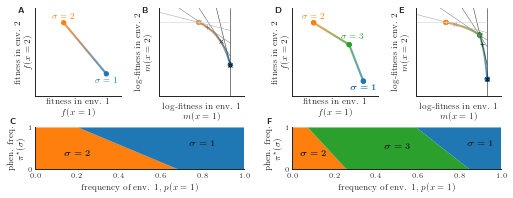

In [4]:
fig = plt.figure(figsize=(7.0, 2.6))
labelkwargs = dict(color=black, va='center', ha='center')

fs = np.asarray([[1.0, 0.3],
     [0.4, 1.0]])
gsleft = gridspec.GridSpec(2, 2, height_ratios=[2.1, 1]) 
axes = [fig.add_subplot(pos) for pos in [gsleft[0, 0], gsleft[0, 1], gsleft[1, :2]]]
plot_transitions(axes, fs)
xy = fs[1, :] + np.array([0.0, 0.04])
axes[0].text(xy[0], xy[1], r'$\sigma = 2$', horizontalalignment='center', verticalalignment='bottom', color=colors[1])
xy = fs[0, :] + np.array([0.0, -0.04])
axes[0].text(xy[0], xy[1], r'$\sigma = 1$', horizontalalignment='center', verticalalignment='top', color=colors[0])
axes[2].text(0.2, 0.4, r'$\bm{\sigma = 2}$', **labelkwargs)
axes[2].text(0.8, 0.6, r'$\bm{\sigma = 1}$', **labelkwargs)
plotting.label_axes(axes[:2], 'AB', xy=(-0.2, 0.95))
plotting.label_axes(axes[2:], 'C', xy=(-0.12, 1.1))

fs = np.asarray([[1.0, 0.2],
                 [0.8, 0.7],
                 [0.3, 1.0]])
gsright = gridspec.GridSpec(2, 2, height_ratios=[2.1, 1]) 
axes = [fig.add_subplot(pos) for pos in [gsright[0, 0], gsright[0, 1], gsright[1, :2]]]
plot_transitions(axes, fs, colororder=[0, 2, 1])
xy = fs[0, :] + np.array([0.0, -0.04])
axes[0].text(xy[0], xy[1], r'$\bm{\sigma = 1$', ha='center', va='top', color=colors[0])
xy = fs[1, :] + np.array([0.05, 0.07])
axes[0].text(xy[0], xy[1], r'$\sigma = 3$', ha='center', va='bottom', color=colors[2])
xy = fs[2, :] + np.array([0.0, 0.04])
axes[0].text(xy[0], xy[1], r'$\sigma = 2$', ha='center', va='bottom', color=colors[1])
axes[2].text(0.1, 0.4, r'$\bm{\sigma = 2}$', **labelkwargs)
axes[2].text(0.9, 0.6, r'$\bm{\sigma = 1}$', **labelkwargs)
axes[2].text(0.5, 0.55, r'$\bm{\sigma = 3}$', **labelkwargs)
plotting.label_axes(axes[:2], 'DE', xy=(-0.2, 0.95))
plotting.label_axes(axes[2:], 'F', xy=(-0.12, 1.1))

gsleft.tight_layout(fig, rect=(0, 0, 0.49, 1), w_pad=1.5, h_pad=0.4, pad=0.25)
gsright.tight_layout(fig, rect=(0.51, 0, 1, 1), w_pad=1.5, h_pad=0.4, pad=0.25)
fig.savefig('svgs/transitions.svg')

**Transitions of the optimal strategy as a function of environmental frequencies without (A-C) and with (D-F) a generalist phenotype.**
        (A,D) Pareto frontier of achievable fitness vectors by phenotypes (dots) and their mixtures (lines).
        (B,E) In log-fitness space a tangent construction (grey lines) yields the optimal strategy (grey crosses) for different environments (from dark to light grey for $p_1=1 \to p_1 = 0$ in $0.2$ steps).
        (C,F) Transitions between switching and non-switching strategies as a function of the probability of encountering environment 1.